# Zastosowanie klasy RouteFInder

In [1]:
from bike_path import RouteFinder

In [11]:
rf = RouteFinder(
    # kwargs w konstruktorze (z wartościami domyślnymi):
    pos=(50.291100737108025, 18.680043199195698),   # Pozycja, z której pobiera mapę osm-> ta pozycja jest od razu ustawiana jako startowa dla algorytmu 
    dist = 2000,    # Promień, z którego pobiera mapę (środek to 'pos')
    bike_type = 'Recumbent'     # Rodzaj roweru-> rodzaj roweru jest kluczem w 'bike_types.yaml', w którym każdemu są przypisane wagi do rodzajów nawoierzchni 
)

In [12]:
# W RouteFinder jest metoda na znalezienie najbliższego wierzchołka do podanych koordynatów:
start = rf.nearest_nodes(pos=(50.291100737108025, 18.680043199195698))

In [15]:
# Metoda zwraca trasę w postaci listy z kolejnymi node_id oraz całkowitą długość trasy
path, total_distance = rf.make_route(
    distance = 3500, # Wymagane
    # start = start, # Jeśli nie jest podany, to bierze ten zainicjaliwoany przy konstruktorze

    # To parametry odpowiadające za dostrojenie algorytmu - zostawiam, bo można dodać taką funkcjonalność (ale lepiej nie, mniej roboty)
    error = 10, 
    divisions = 4
)
print(f"Pierwsze 5 punktów trasy to: {path[:5]}\nNatomiast jej całkowity dystans to {total_distance}m")

Pierwsze 5 punktów trasy to: [264864144, 264864141, 1021364360, 1021364253, 900922138]
Natomiast jej całkowity dystans to 3587.1569999999992m


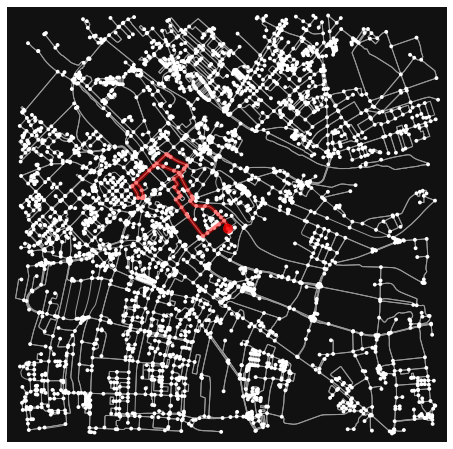

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [16]:
# Dla podglądu można też wywołać metodę rysującą wykresik:
rf.plot_graph(path=path)

In [6]:
# Konwersja z node_id do koordynatów wierzchołków:
path_cords = rf.nodes_to_cords(path)
print(path_cords[:5])

[[50.2907735, 18.6799432], [50.2914683, 18.6794243], [50.291144, 18.6787388], [50.29084, 18.6780977], [50.2904077, 18.6771855]]


### Dodatkowe uwagi
Będę jeszcze testował ten algorytm, natomiast na tę chwilę stabilnie znajduje przyzwoite drogi. Jeśli chodzi o odległość promienia, z którego pobierana jest mapa, a dystans szukanej trasy, myślę że ich stosunek może być jako 1:3, natomiast trzeba będzie to jeszcze potestować (albo skonsultować z klientem 🤓) 

# Przypadki bardzo duże

Planujemy zrobić serializację załadowanych grafów dla pewnych obszarów, np Gliwic, żeby ładowanie mapy tyle nie zajmowało.
Algorytm też planujemy optymalizować.
Poniższy przykład zajął u mnie (Antek) po ~minucie na załadowanie grafu i znalezienie trasy

In [7]:
rf = RouteFinder(
    dist = 20000
)

Pierwsze 5 punktów trasy to: [264864144, 264864141, 1021364360, 1021364253, 900922138]
Natomiast jej całkowity dystans to 58317.47600000003m


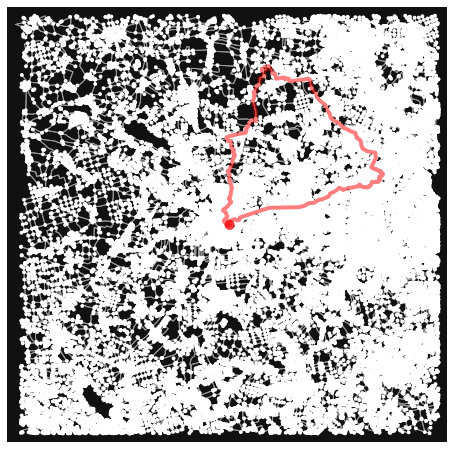

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [8]:
path, total_distance = rf.make_route(
    distance = 60000
)
print(f"Pierwsze 5 punktów trasy to: {path[:5]}\nNatomiast jej całkowity dystans to {total_distance}m")
rf.plot_graph(path=path)